In [1]:
import tensorflow as tf
from tqdm import trange
import sys
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

from models.tfkeras_resnets import build_resnet, get_resnet_build_function
from dataset_utils.tf_dataset_preprocessors_image_classification import *
from dataset_utils.tfrecord_dataset_creator import TFRecordDatasetCreator, get_tfrecord_paths
from training.training import Training

%matplotlib inline

In [2]:
num_classes = 257
image_shape = (224, 224, 3)

In [3]:
batch_size = 32
shuffle_buffer_size = 10000
num_parallel_reads = 4
num_parallel_calls = 4
prefetch = 10

train_directory = '/pierluigiferrari/datasets/Caltech256/train/'
val_directory = '/pierluigiferrari/datasets/Caltech256/val/'

feature_schema = {'image': tf.FixedLenFeature([], tf.string),
                  'filename': tf.FixedLenFeature([], tf.string),
                  'label': tf.FixedLenFeature([], tf.int64)}

unpack_images_labels = UnpackImagesLabels()
decode_images = DecodeJPEGImages(channels=3)
resize_with_pad = ResizeWithPad(target_size=image_shape[:2])
convert_labels_to_one_hot = ConvertLabelsToOneHot(num_classes=257)
random_flip_left_right = RandomFlipLeftRight()
random_brightness = RandomBrightness(max_delta=0.5)
random_saturation = RandomSaturation(lower=0.5, upper=1.5)

train_preprocessors = [unpack_images_labels,
                       decode_images,
                       random_flip_left_right,
                       resize_with_pad,
                       convert_labels_to_one_hot]

val_preprocessors = [unpack_images_labels,
                     decode_images,
                     resize_with_pad,
                     convert_labels_to_one_hot]

train_dataset_creator = TFRecordDatasetCreator(tfrecord_paths=get_tfrecord_paths(directory=train_directory, extension='tfrecord'),
                                               feature_schema=feature_schema,
                                               batch_size=batch_size,
                                               preprocessors=train_preprocessors,
                                               repeat=True,
                                               num_epochs=None,
                                               shuffle=True,
                                               shuffle_buffer_size=shuffle_buffer_size,
                                               num_parallel_reads=num_parallel_reads,
                                               num_parallel_calls=num_parallel_calls)

val_dataset_creator = TFRecordDatasetCreator(tfrecord_paths=get_tfrecord_paths(directory=val_directory, extension='tfrecord'),
                                             feature_schema=feature_schema,
                                             batch_size=batch_size,
                                             preprocessors=val_preprocessors,
                                             repeat=True,
                                             num_epochs=None,
                                             shuffle=False,
                                             shuffle_buffer_size=shuffle_buffer_size,
                                             num_parallel_reads=num_parallel_reads,
                                             num_parallel_calls=num_parallel_calls)

train_dataset = train_dataset_creator.create_dataset(prefetch=prefetch)
val_dataset = val_dataset_creator.create_dataset(prefetch=prefetch)

In [4]:
build_function = get_resnet_build_function(kernel_type='regular',#'antisymmetric',
                                           include_top=True,
                                           fc_activation='softmax',
                                           num_classes=num_classes,
                                           l2_regularization=0.0,
                                           subtract_mean=127.5,
                                           divide_by_stddev=127.5,
                                           version=1,
                                           preset=None,#'resnet50',
                                           blocks_per_stage=[1, 1, 1, 1],
                                           filters_per_block=[[64, 64, 128],
                                                           [64, 64, 256],
                                                           [128, 128, 512],
                                                           [256, 256, 1024]],
                                           use_batch_norm=True)

learning_rate = tf.placeholder(dtype=tf.float32, shape=(), name='learning_rate')
adam = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [5]:
trainer = Training(model_build_function=build_function,
                   optimizer=adam,
                   train_dataset=train_dataset,
                   val_dataset=val_dataset,
                   summaries=['mean_gradient_norms'])

TensorFlow Version: 1.12.0


In [6]:
trainer.train(epochs=1,
              steps_per_epoch=1000,
              learning_rate_schedule=lambda x: 0.001,
              eval_dataset='val',
              eval_frequency=1,
              eval_steps=240,
              save_during_training=False,
              save_dir=None,
              save_best_only=True,
              save_tags=['default'],
              save_name='',
              save_frequency=5,
              saver='saved_model',
              monitor='loss',
              record_summaries=True,
              summaries_frequency=10,
              summaries_dir='./local/',
              summaries_name='test_run',
              csv_logger_dir='./local/history/',
              csv_logger_name='gradient_history')

Default GPU Device: /device:GPU:0
Epoch 1/1:  31%|███       | 306/1000 [01:00<01:15,  9.15it/s, mean_loss=5.06, accuracy=0.0834] 

KeyboardInterrupt: 

In [6]:
trainer.train(epochs=1,
              steps_per_epoch=100,
              learning_rate_schedule=lambda x: 0.001,
              eval_dataset='val',
              eval_frequency=1,
              eval_steps=100,
              save_during_training=False,
              save_dir=None,
              save_best_only=True,
              save_tags=['default'],
              save_name='',
              save_frequency=5,
              saver='saved_model',
              monitor='loss',
              record_summaries=True,
              summaries_frequency=10,
              summaries_dir='./local/',
              summaries_name='test_run',
              csv_logger_dir='./local/history/',
              csv_logger_name='gradient_history')

Default GPU Device: /device:GPU:0
Evaluation on validation dataset: 100%|██████████| 100/100 [00:06<00:00, 15.91it/s, accuracy=0.0177, mean_loss=7.2]


In [6]:
trainer.train(epochs=1,
              steps_per_epoch=100,
              learning_rate_schedule=lambda x: 0.001,
              eval_dataset='val',
              eval_frequency=1,
              eval_steps=100,
              save_during_training=False,
              save_dir=None,
              save_best_only=True,
              save_tags=['default'],
              save_name='',
              save_frequency=5,
              saver='saved_model',
              monitor='loss',
              record_summaries=True,
              summaries_frequency=10,
              summaries_dir='./local/',
              summaries_name='test_run',
              csv_logger_dir='./local/history/',
              csv_logger_name='gradient_history')

Default GPU Device: /device:GPU:0
Evaluation on validation dataset: 100%|██████████| 100/100 [00:09<00:00, 10.25it/s, accuracy=0.00758, mean_loss=8.37]


In [6]:
trainer.train(epochs=1,
              steps_per_epoch=100,
              learning_rate_schedule=lambda x: 0.001,
              eval_dataset='val',
              eval_frequency=1,
              eval_steps=100,
              save_during_training=False,
              save_dir=None,
              save_best_only=True,
              save_tags=['default'],
              save_name='',
              save_frequency=5,
              saver='saved_model',
              monitor='loss',
              record_summaries=True,
              summaries_frequency=10,
              summaries_dir='./local/',
              summaries_name='test_run',
              csv_logger_dir='./local/history/',
              csv_logger_name='gradient_history')

Default GPU Device: /device:GPU:0
Evaluation on validation dataset: 100%|██████████| 100/100 [00:10<00:00,  9.88it/s, accuracy=0.0256, mean_loss=6.41]


In [22]:
import csv

gradient_norm_values = []
training_steps = []

with open('./local/history/gradient_history.csv', 'r') as history:
    
    csv_reader = csv.reader(history, delimiter=' ')
    header = next(csv_reader)
    for row in csv_reader:
        training_steps.append(int(row[0]))
        gradient_norm_values.append(np.array(row[1:], dtype=np.float))
        
gradient_norm_values = np.array(gradient_norm_values)
training_steps = np.array(training_steps)

In [61]:
x = np.arange(1, gradient_norm_values.shape[1] + 1)
y = training_steps[::10]
x, y = np.meshgrid(x, y)
z = gradient_norm_values[::10]

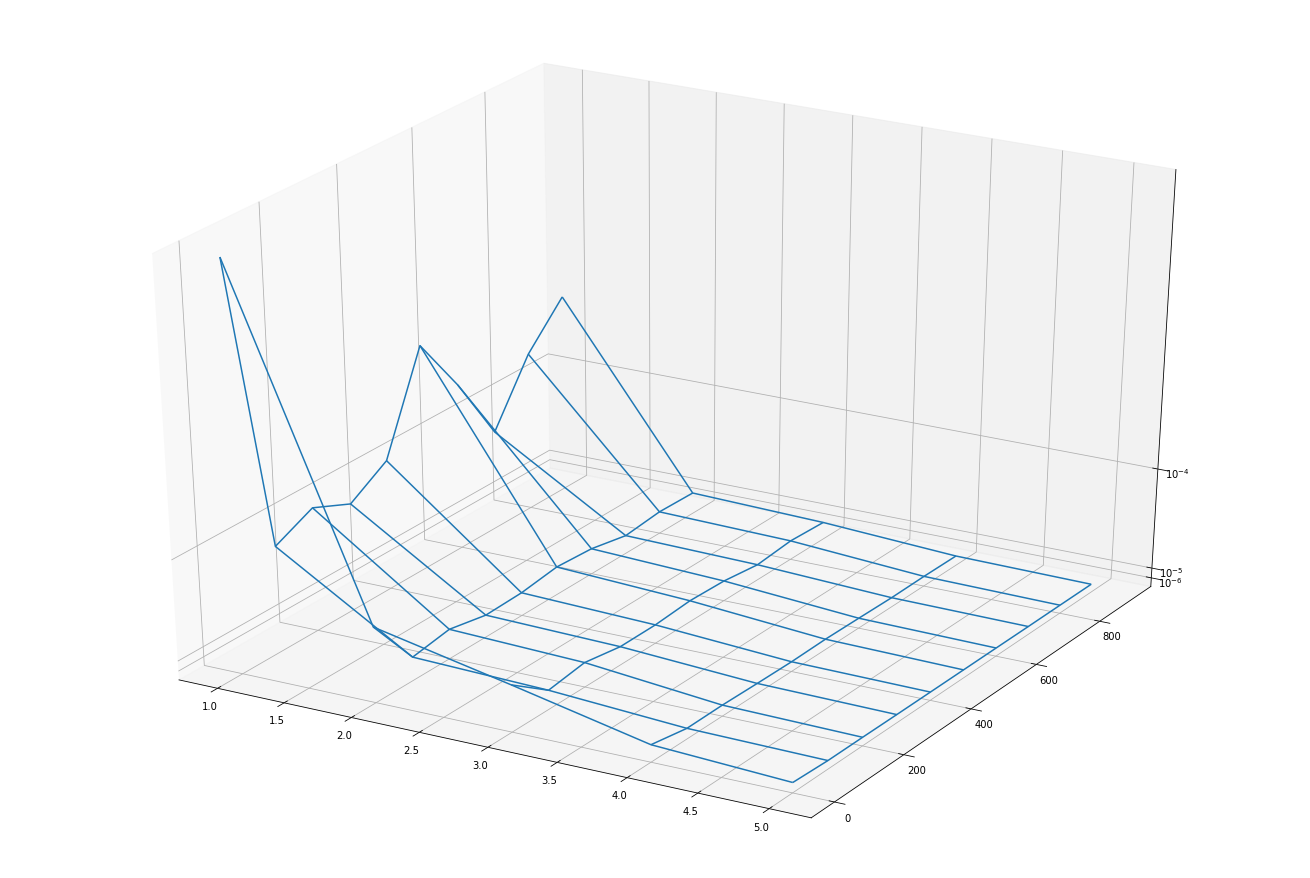

In [70]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,12))
ax = Axes3D(fig)

ax.plot_wireframe(x, y, z, rstride=1, cstride=1)
ax.zaxis._set_scale('log')
#ax.set_zlim3d(0,0.0001)

plt.show()

In [9]:
min_kernel_size = 3
min_kernel_rank = 1
valid_variable_types = ['kernel', 'bias']

for gradient, variable in trainer.grads_and_vars:
    variable_name = variable.name.split(':')[0]
    variable_type = variable_name.split('/')[-1]
    if (variable_type in valid_variable_types
        and variable.shape[0] >= min_kernel_size
        and len(variable.shape) >= min_kernel_rank):
        print(variable_name+'_gradient_mean_norm', variable.shape)

conv1/kernel_gradient_mean_norm (7, 7, 3, 64)
conv1/bias_gradient_mean_norm (64,)
res2_0_branch2a/bias_gradient_mean_norm (64,)
res2_0_branch2b/kernel_gradient_mean_norm (3, 3, 64, 64)
res2_0_branch2b/bias_gradient_mean_norm (64,)
res2_0_branch2c/bias_gradient_mean_norm (128,)
res2_0_branch1/bias_gradient_mean_norm (128,)
res3_0_branch2a/bias_gradient_mean_norm (64,)
res3_0_branch2b/kernel_gradient_mean_norm (3, 3, 64, 64)
res3_0_branch2b/bias_gradient_mean_norm (64,)
res3_0_branch2c/bias_gradient_mean_norm (256,)
res3_0_branch1/bias_gradient_mean_norm (256,)
res4_0_branch2a/bias_gradient_mean_norm (128,)
res4_0_branch2b/kernel_gradient_mean_norm (3, 3, 128, 128)
res4_0_branch2b/bias_gradient_mean_norm (128,)
res4_0_branch2c/bias_gradient_mean_norm (512,)
res4_0_branch1/bias_gradient_mean_norm (512,)
res5_0_branch2a/bias_gradient_mean_norm (256,)
res5_0_branch2b/kernel_gradient_mean_norm (3, 3, 256, 256)
res5_0_branch2b/bias_gradient_mean_norm (256,)
res5_0_branch2c/bias_gradient_mean_

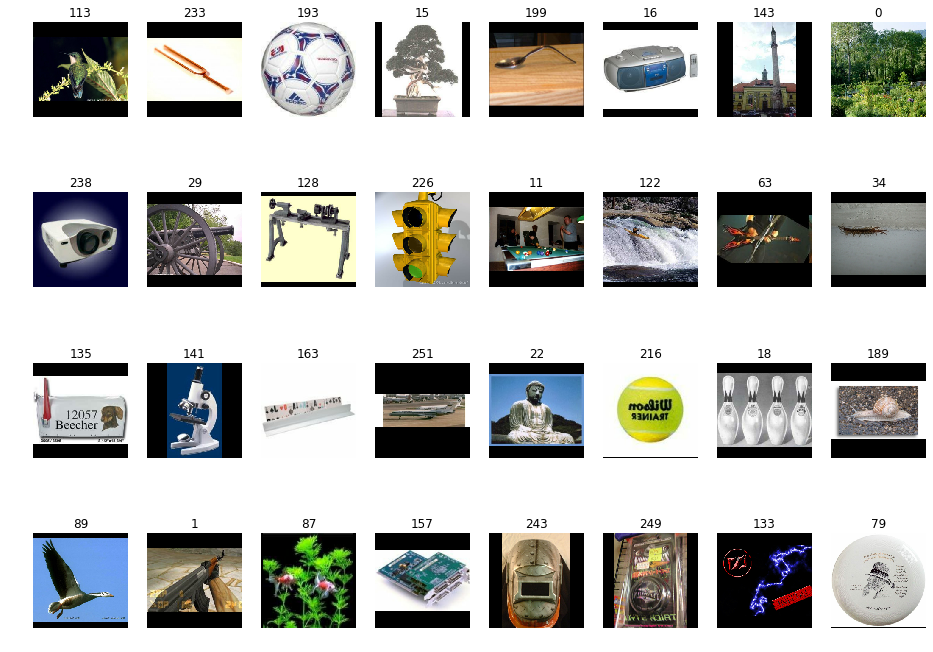

In [8]:
batch_images, batch_labels = sess.run([features, labels])

grid_m = 4
grid_n = 8

f0, cell0 = plt.subplots(grid_m, grid_n, figsize=(16,12))
for i in range(grid_m):
    for j in range(grid_n):
        cell0[i, j].imshow(batch_images[i*grid_n+j].astype(np.uint8))
        cell0[i, j].axis('off')
        cell0[i, j].set_title(np.argmax(batch_labels[i*grid_n+j].astype(np.uint8)))